Обзор проблемы

Диабет – это хроническое заболевание, которое возникает либо в случаях, когда поджелудочная железа не вырабатывает достаточное количество инсулина, либо когда организм не может эффективно использовать вырабатываемый инсулин. Инсулин – это гормон, регулирующий уровень глюкозы в крови. Распространенным следствием неконтролируемого диабета является гипергликемия, или повышенный уровень содержания глюкозы (сахара) в крови, со временем приводящая к серьезному повреждению многих систем организма, особенно нервов и кровеносных сосудов.

Диабет 2-го типа
Диабет 2-го типа (ранее – инсулинонезависимый диабет, диабет взрослых) вызван неспособностью организма эффективно использовать вырабатываемый им инсулин. Более 95% диабетиков – люди с диабетом 2‑го типа. Данный тип диабета возникает, главным образом, на фоне избыточной массы тела и недостаточной физической активности.

Его симптомы могут быть сходными с симптомами диабета 1‑го типа, но часто менее выражены. В результате болезнь нередко диагностируется по прошествии нескольких лет после ее возникновения, уже после появления осложнений.

До недавнего времени диабет этого типа наблюдался лишь среди взрослых, однако в настоящее время он все чаще поражает и детей.

Диабет 1-го типа
При диабете 1‑го типа (ранее — инсулинозависимый, юношеский или детский), для которого характерна недостаточная выработка инсулина, пациенту требуется ежедневное введение инсулина. В 2017 г. в мире было зарегистрировано 9 миллионов больных диабетом 1‑го типа, причем большинство из них проживали в странах с высоким уровнем дохода. В настоящее время причина этого типа диабета неизвестна, а меры профилактики не разработаны.

Симптомы включают чрезмерное мочеотделение (полиурия), жажду (полидипсия), постоянное чувство голода, потерю веса, нарушения зрения и усталость. Эти симптомы могут появиться внезапно.

Гестационный диабет
Гестационный диабет проявляется гипергликемией с показателями глюкозы крови, которые превышают нормальные, однако не достигают диагностически значимых для постановки диагноза диабета. Гестационный диабет развивается во время беременности.

Женщинам с такой формой диабета угрожает повышенный риск осложнений во время беременности и родов. Такие женщины и, возможно, их дети также подвергаются повышенному риску развития диабета 2 типа в ходе дальнейшей жизни.

Чаще всего гестационный диабет диагностируется не по жалобам пациентки, а при проведении пренатального скрининга.

### 1. Знакомство с данными

Заранее импортируем модули, которые понадобятся для решения задачи:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import pivot_table
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Прочитаем файл с исходными данными:

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


В данном датесете, посвященном диабету, содержатся следующие признаки (факторы):
* Pregnancies - Количество беременностей
* Glucose - Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе
* BloodPressure - Диастолическое кровяное давление (мм рт. ст.)
* SkinThickness - Толщина кожной складки трицепса (мм)
* Insulin - 2-часовой сывороточный инсулин (ме Ед/мл)
* BMI - Индекс массы тела (вес в кг/ (рост в м)^2)
* DiabetesPedigreeFunction - Функция родословной диабета
* Age - Возраст (годы)
* Outcome - Переменная класса (0 или 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Очевидных пропущенных значений нет, однако они могут скрываться под нулевыми значениями.

Посмотрим на описательные статистики:

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Итак, проанализируем, где могут быть скрыты пропущенные значения. Не могут равняться нулю показатели уровня глюкозы, кровяного давления, толщины кожи, инсулина и индекса массы тела. Это не имеет никакого смысла. Поэтому сразу заменим нулевые значения в данных признаках на np.NaN.

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Теперь пропущенные значения явно обозначены и можно переходить к предобработке данных.

### 2. Предобработка и очистка данных

Проанализируем пропуски в данных:

In [16]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
display(cols_with_null)

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

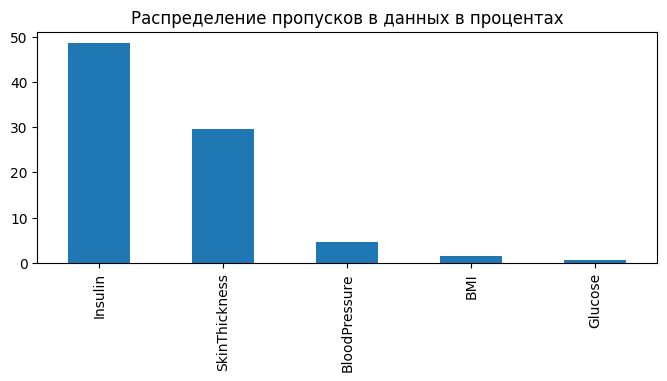

In [17]:
cols_with_null.plot(
    kind='bar',
    figsize=(8, 3),
    title='Распределение пропусков в данных в процентах'
);

Согласно графику выше наибольшее количество пропусков содержится в признаках Insulin (49%) и SkinThickness(29%). Необходимо обработать данные пропуски. Для этого необходимо понимать распределение данных.

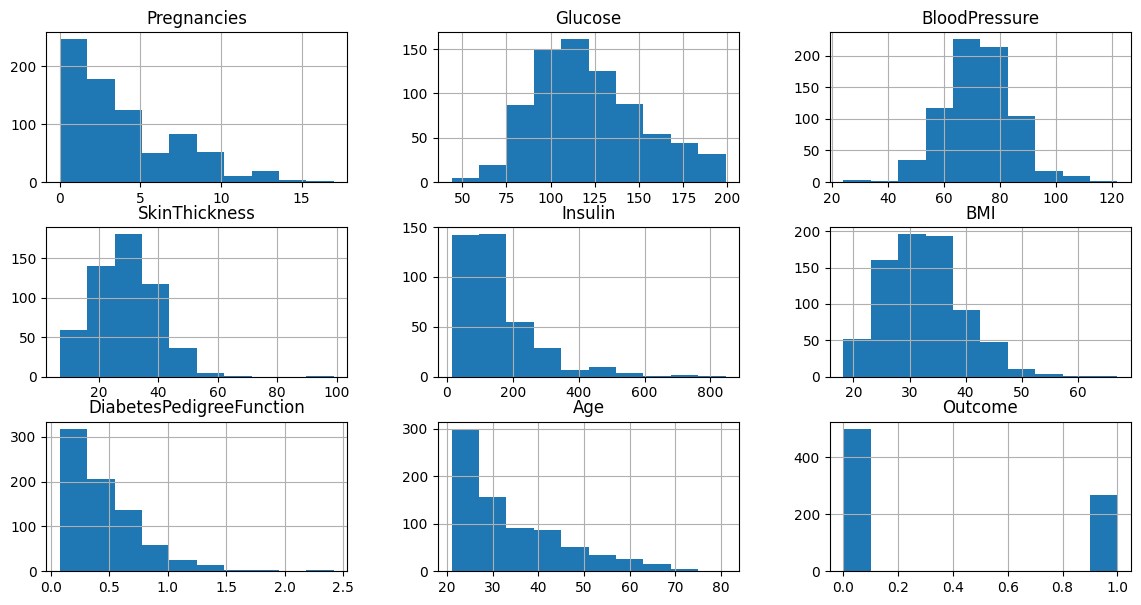

In [20]:
distribution_chart = data.hist(figsize=(14, 7))

Для распределений, похожих на логнормальное, предпочтительнее использовать медианное значение для таких признаков.

In [77]:
def get_median(column):
    """Функция вычисляет медианную величину для заданного признака в зависимости от наличия у пациента диабета
           
    Args:
        column ([object]): строка с наименованием признака (фактора)

    Returns:
        [DataFrame]: Функция возвращает DataFrame с вычисленными медианами для заданного признака в разрезе пациентов с диагностированным диабетом и без
        
    """   
    temp = data[data[column].notnull()]
    temp = temp[[column, 'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return temp

In [40]:
get_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


Медианные значения инсулина для пациентов с диабетом и без него сильно отличаются, поэтому заполнение пропущенных значений будем проводить в зависимости признака Outcome.

In [42]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [43]:
get_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [45]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

In [46]:
get_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [47]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [48]:
get_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [49]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [50]:
get_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [51]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107.0
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140.0

Посмотрим на графики распределений данных после заполнения пропусков:

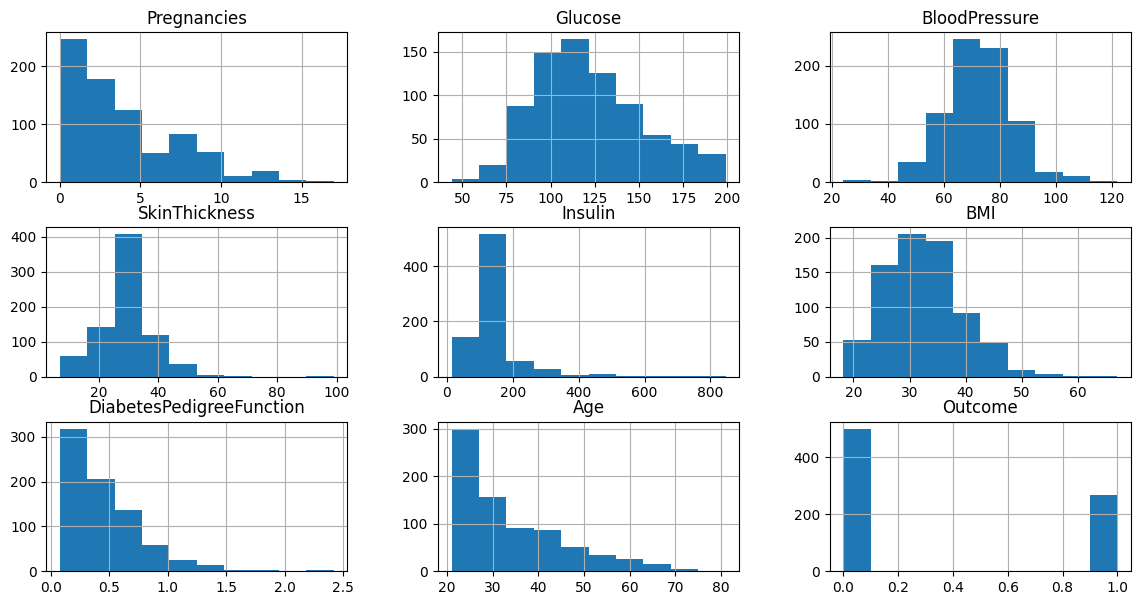

In [52]:
distribution_chart = data.hist(figsize=(14, 7))

Как видно на гистограммах выше, изменилась форма распределений для признаков SkinThickness и Insulin, в признаках которых было наибольшее количество пропусков. Распределения стали ближе по форме к нормальным. Остальные графики остались визуально без значительных изменений ввиду небольшого количества пропусков. 

In [53]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Таким образом, пропуски в данных успешно обработаны.

In [64]:
data.duplicated().sum()

0

Дубликаты в датасете отсутствуют.

Следующим шагом проанализируем датасет на наличие выбросов. Необходимо учитывать тот факт, что в датасете содержится немного данных - 768 строк, - поэтому подходить к обработке выбросов нужно будет консервативно.

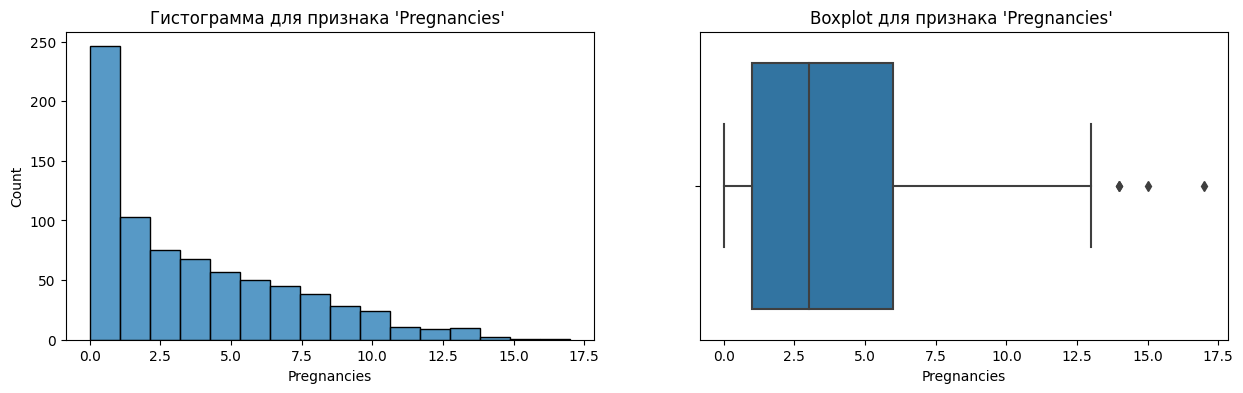

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='Pregnancies', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'Pregnancies' ");
boxplot = sns.boxplot(data=data, x='Pregnancies', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'Pregnancies' ");

Признак количества беременностей имеет логнормальное распределение и данные выглядят логично, 17 беременностей вполне себе может быть.

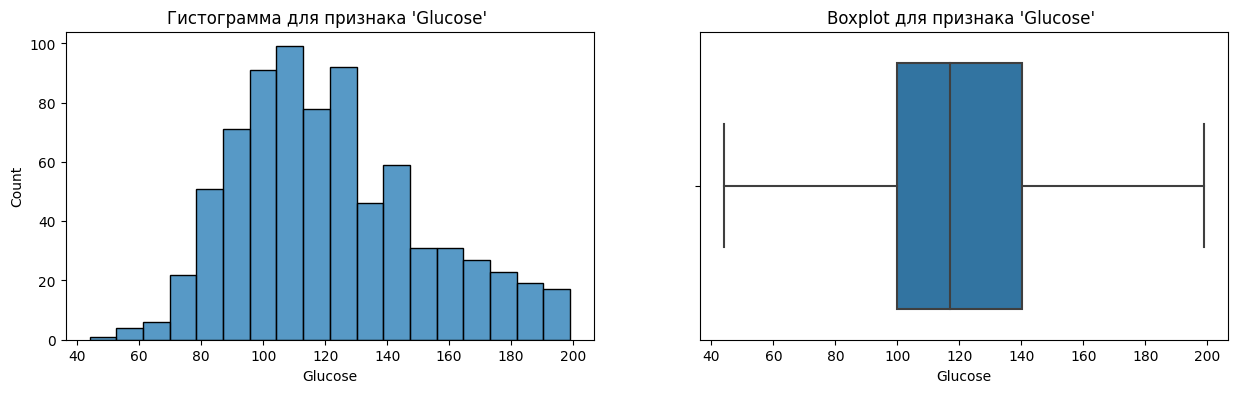

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='Glucose', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'Glucose' ");
boxplot = sns.boxplot(data=data, x='Glucose', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'Glucose' ");

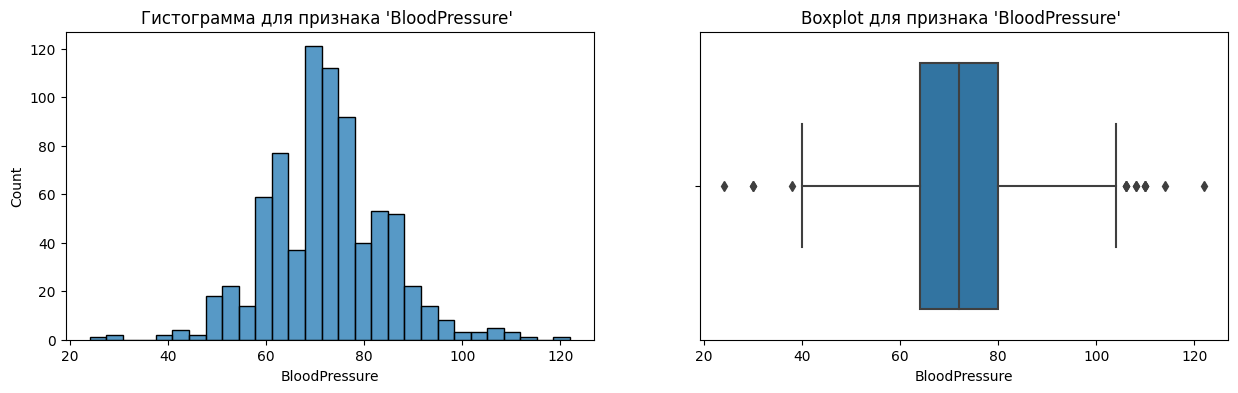

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='BloodPressure', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'BloodPressure' ");
boxplot = sns.boxplot(data=data, x='BloodPressure', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'BloodPressure' ");

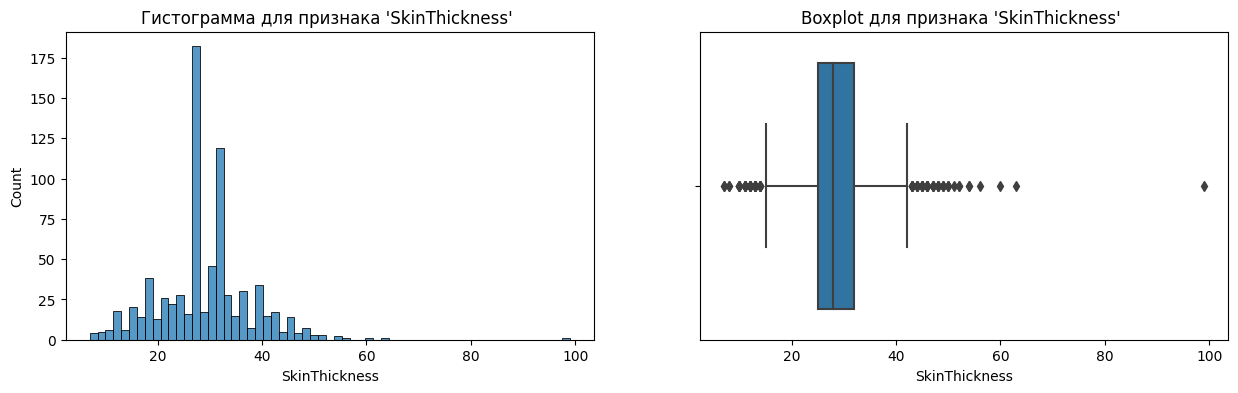

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='SkinThickness', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'SkinThickness' ");
boxplot = sns.boxplot(data=data, x='SkinThickness', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'SkinThickness' ");

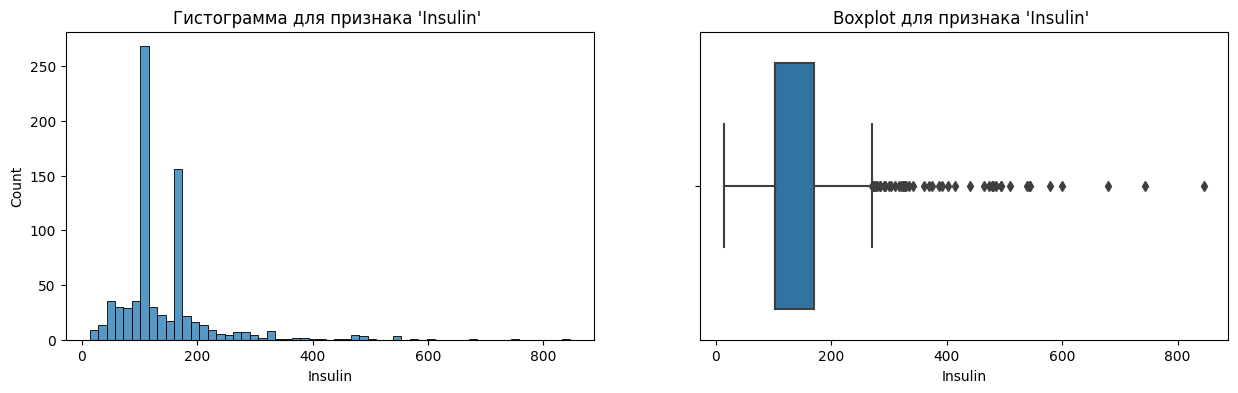

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='Insulin', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'Insulin' ");
boxplot = sns.boxplot(data=data, x='Insulin', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'Insulin' ");

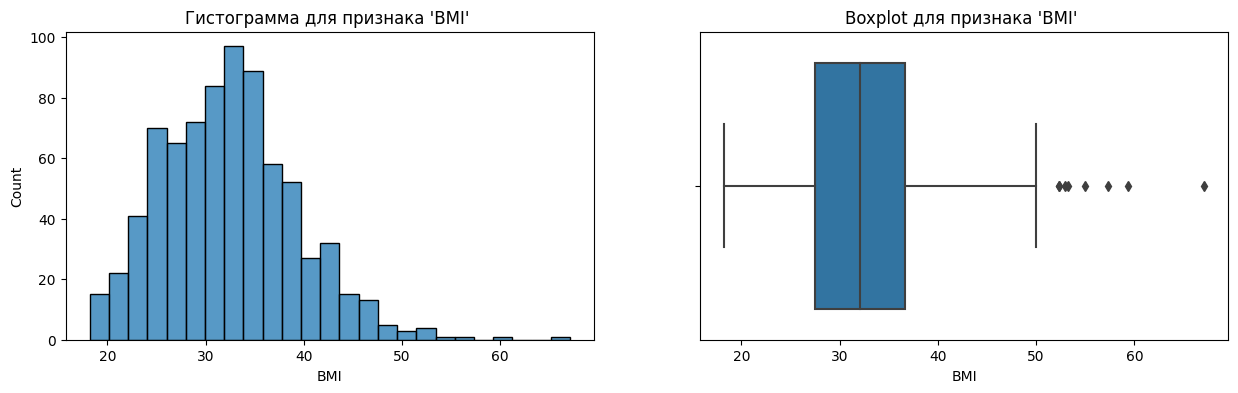

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='BMI', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'BMI' ");
boxplot = sns.boxplot(data=data, x='BMI', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'BMI' ");

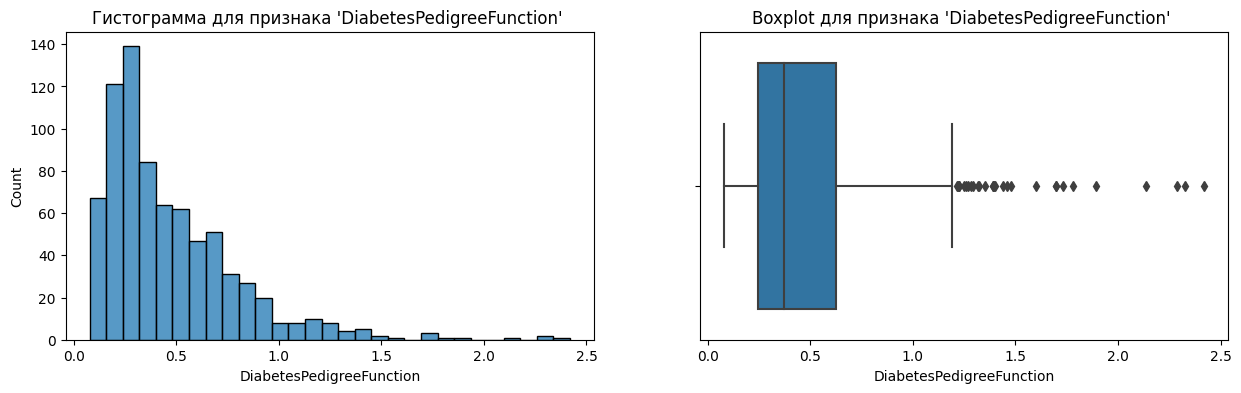

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='DiabetesPedigreeFunction', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'DiabetesPedigreeFunction' ");
boxplot = sns.boxplot(data=data, x='DiabetesPedigreeFunction', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'DiabetesPedigreeFunction' ");

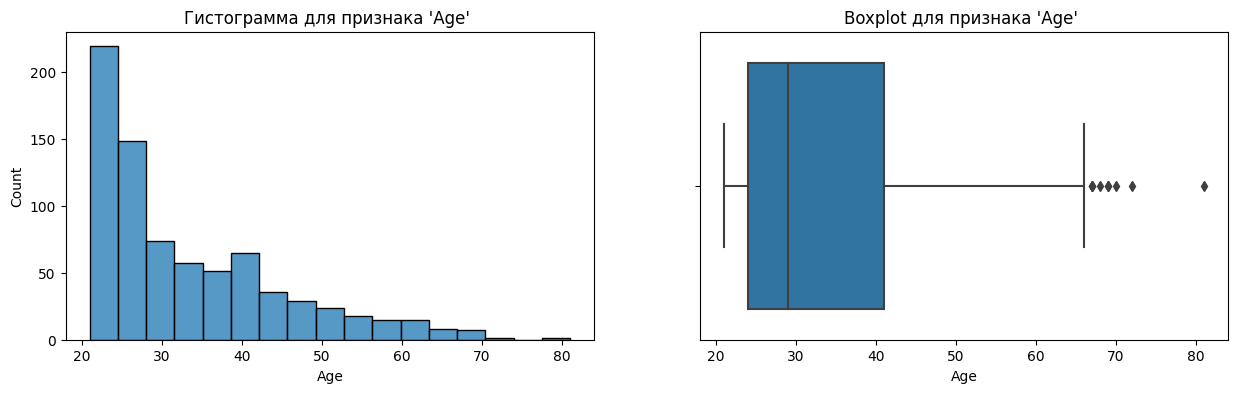

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='Age', ax=axes[0]);
histplot.set_title("Гистограмма для признака 'Age' ");
boxplot = sns.boxplot(data=data, x='Age', ax=axes[1]);
boxplot.set_title("Boxplot для признака 'Age' ");

### 3. Разведывательный анализ данных (EDA)

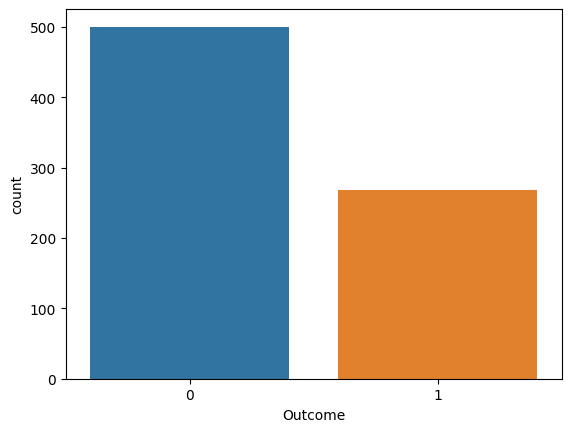

In [75]:
sns.countplot(x='Outcome', data=data)
plt.show()

Как видно по графику выше, данные не сбалансрованны: количество пациентов с диабетом составляет 268, а без диабета - 500.

### 4. Отбор и преобразование признаков

### 5. Решение задачи классификации: линейная регрессия и деревья решений

### 6. Решение задачи классификации: ансамблевые методы и построение прогноза